In [1]:
import tensorflow as tf


In [2]:
als_labels = ['A', 'B', 'C', 'D', 'del', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'nothing', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

In [3]:
classes = 29
batch = 32
epochs = 15
learning_rate = 0.001

args = {
    "labels" : "inferred",
    "label_mode" : "categorical",
    "batch_size" : batch,
    "image_size" : (32, 32),
    "seed" : 1,
    "class_names" : als_labels
}

train_data = tf.keras.utils.image_dataset_from_directory('./Dataset/asl_alphabet_train/asl_alphabet_train',**args)

Found 87000 files belonging to 29 classes.


In [4]:
# ONLY WHEN RAW TEST IS BEING USED.

# from pathlib import Path
# import shutil
# import os

# for img in Path('./Dataset/asl_alphabet_test/asl_alphabet_test').iterdir():
#     print(img.name)
#     als_char = img.name.split('_',1)[0]
#     folder_path = './Dataset/asl_alphabet_test/asl_alphabet_test/' + als_char
#     os.mkdir(folder_path)
#     shutil.move(img.absolute(), folder_path)


In [5]:
# als_test_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'nothing', 'space']
test_args = {
    "labels" : "inferred",
    "label_mode" : "categorical",
    "image_size" : (32, 32),
    "seed" : 1,
    "class_names" : als_labels
}
test_data = tf.keras.utils.image_dataset_from_directory('./Dataset/asl_alphabet_test/asl_alphabet_test',**test_args)

Found 28 files belonging to 29 classes.


In [6]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 29), dtype=tf.float32, name=None))>

In [7]:
# Performance Optimization.
train_data = train_data.cache().prefetch(buffer_size = tf.data.AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size = tf.data.AUTOTUNE)

## Model Build

In [8]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([
    layers.Rescaling(1/255),

    layers.Conv2D(64, (3,3), padding="same", activation="relu", input_shape = (32,32,3)),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.BatchNormalization(),
    layers.Dropout(.2),

    layers.Conv2D(128, (3,3), padding="same", activation="relu", input_shape = (32,32,3)),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.BatchNormalization(),
    layers.Dropout(.2),

    layers.Conv2D(256, (3,3), padding="same", activation="relu", input_shape = (32,32,3)),
    layers.MaxPooling2D(pool_size = (2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dropout(.2),
    layers.Dense(1024,activation="relu"),
    layers.Dense(len(als_labels), activation="softmax")

])

In [9]:
adam = Adam(lr=learning_rate)
model.compile(optimizer=adam, loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

d:\ALS Project\als-env\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
model.build((None, 32, 32, 3))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       7

In [11]:
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=epochs,
    shuffle = True,
    verbose=1
)

Epoch 1/15


d:\ALS Project\als-env\lib\site-packages\keras\backend.py:5531: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2719/2719 [==============================] - 663s 241ms/step - loss: 0.5044 - accuracy: 0.8458 - val_loss: 0.0397 - val_accuracy: 0.9643
Epoch 2/15
2719/2719 [==============================] - 24s 9ms/step - loss: 0.1151 - accuracy: 0.9653 - val_loss: 8.4873e-04 - val_accuracy: 1.0000
Epoch 3/15
2719/2719 [==============================] - 24s 9ms/step - loss: 0.0839 - accuracy: 0.9765 - val_loss: 1.2423e-04 - val_accuracy: 1.0000
Epoch 4/15
2719/2719 [==============================] - 24s 9ms/step - loss: 0.0598 - accuracy: 0.9847 - val_loss: 0.0332 - val_accuracy: 0.9643
Epoch 5/15
2719/2719 [==============================] - 24s 9ms/step - loss: 0.0548 - accuracy: 0.9859 - val_loss: 9.8457e-04 - val_accuracy: 1.0000
Epoch 6/15
2719/2719 [==============================] - 25s 9ms/step - loss: 0.0502 - accuracy: 0.9873 - val_loss: 0.3138 - val_accuracy: 0.9643
Epoch 7/15
2719/2719 [==============================] - 25s 9ms/step - loss: 0.0441 - accuracy: 0.9897 - val_loss: 0.1699 - va

<AxesSubplot: >

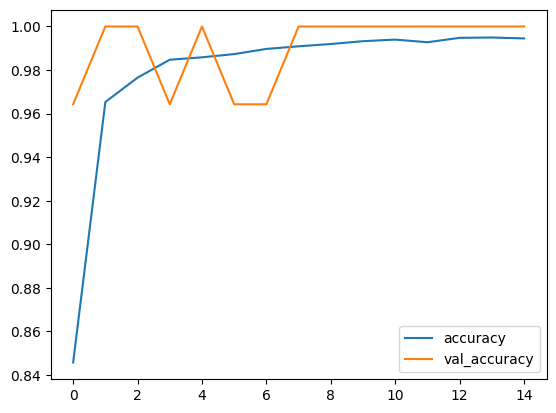

In [12]:
import pandas as pd

history_df = pd.DataFrame.from_dict(history.history)
history_df[['accuracy', 'val_accuracy']].plot()

<AxesSubplot: >

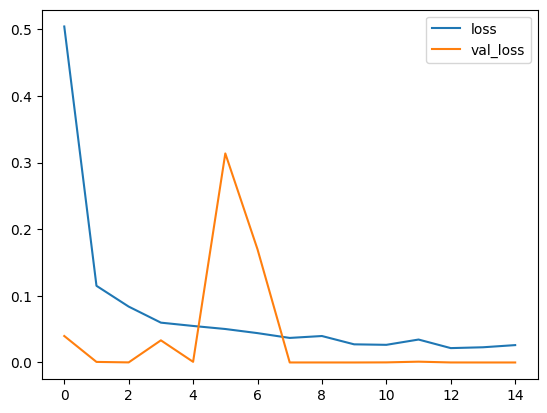

In [13]:
history_df[['loss', 'val_loss']].plot()

## Predictions

In [14]:
import numpy as np

preds = model.predict(test_data)
predicted_class = np.argmax(preds, axis = 1)
predicted_class

1/1 [==============================] - 1s 1s/step


array([14,  5,  1, 12,  2, 13, 21, 25, 18, 10, 16, 15, 17, 28,  6,  3, 27,
       19,  8, 11, 24, 23,  7,  0, 22,  9, 20, 26], dtype=int64)

In [15]:
actual_labels = np.concatenate([y for _,y in test_data], axis = 0)
actual_class = np.argmax(actual_labels, axis = 1)
actual_class

array([14,  5,  1, 12,  2, 13, 21, 25, 18, 10, 16, 15, 17, 28,  6,  3, 27,
       19,  8, 11, 24, 23,  7,  0, 22,  9, 20, 26], dtype=int64)

In [17]:
import itertools
from PIL import Image

actual_images = [x.numpy().astype("uint8") for x,_ in test_data]
actual_images = list(itertools.chain.from_iterable(actual_images))
actual_images = [Image.fromarray(x) for x in actual_images]

In [18]:
pred_df = pd.DataFrame(zip(predicted_class, actual_class, actual_images), columns = ["prediction", "actual", "actual image"])

In [19]:
pred_df.head()

,prediction,actual,actual image
0,14,14,<PIL.Image.Image image mode=RGB size=32x32 at ...
1,5,5,<PIL.Image.Image image mode=RGB size=32x32 at ...
2,1,1,<PIL.Image.Image image mode=RGB size=32x32 at ...
3,12,12,<PIL.Image.Image image mode=RGB size=32x32 at ...
4,2,2,<PIL.Image.Image image mode=RGB size=32x32 at ...


In [20]:
pred_df['prediction'] = pred_df['prediction'].apply(lambda x: als_labels[x])
pred_df['actual'] = pred_df['actual'].apply(lambda x: als_labels[x])

In [22]:
import base64
import io

def image_formatter(img):
    with io.BytesIO() as buffer:
        img.save(buffer, 'png')
        img_str = base64.b64encode(buffer.getvalue()).decode()
        return f'<img src="data:image/jpeg;base64,{img_str}">'

pred_df.head(10).style.format({'image': image_formatter})

,prediction,actual,actual image
0,N,N,
1,E,E,
2,B,B,
3,L,L,
4,C,C,
5,M,M,
6,space,space,
7,W,W,
8,Q,Q,
9,J,J,
